# Day 09

## 기초 개념

* Database


* DBMS(Database Management System)


* DBMS의 종류
  * 관계형 데이터베이스 관리 시스템 (RDBMS: Relational Database Management System)
    * SQL(Structured Query Language)
  * NoSQL DBMS


* DBMS의 구조
  * 데이터베이스(database)
  * 테이블(table)
    * 스키마(schema)
  * 레코드(record)


* SQL
  * 생성(Create): INSERT
  * 읽기(Read): SELECT
  * 갱신(Update): UPDATE
  * 삭제(Delete): DELETE


* 트랜잭션(Transaction)
  * 데이터베이스의 작업 단위
  * 커밋(commit)
    * 트랜잭션 내용을 적용
  * 롤백(rollback)
    * 과거의 상태로 되돌림


* ACID
  * 원자성(Atomicity)
    * 작업들이 부분적으로 실행되지 않고 완결되는 것을 보장
  * 일관성(Consistency)
    * 
  * Isolation
  * Durability


## PostgreSQL

### 가동

ssh 프로그램이나 docker attach 명령, 또는 jupyter notebook의 terminal을 이용하여 도커 컨테이너 콘솔로 들어간 뒤

```
sudo service postgresql start
```

### 콘솔

콘솔에서 데이터베이스르 조작하는 명령은 권한을 가진 `postgres` 라는 계정으로 실행해야 하므로 항상 `sudo -u postgres`를 붙여서 실행한다.

* 시작
```
sudo -u postgres psql
```


* 종료
```
postgres=# \q
```


* 콘솔 도움말(vi 모드)
```
postgres=# \?
```


* SQL 도움말
```
postgres=# \h
```


## 교재

* http://www.postgresqltutorial.com/

### 샘플 데이터베이스 다운로드

```
$ wget -O dvdrental.zip http://www.postgresqltutorial.com/download/dvd-rental-sample-database/?wpdmdl=969
$ unzip dvdrental.zip
```

### 샘플 데이터베이스 생성 (bash shell에서)

```
$ sudo -u postgres createdb dvdrental

$ sudo -u postgres pg_restore -d dvdrental dvdrental.tar

$ sudo -u postgres psql
psql (9.5.6)
Type "help" for help.

postgres=# \c dvdrental
You are now connected to database "dvdrental" as user "postgres".

dvdrental-# \dt
             List of relations
 Schema |     Name      | Type  |  Owner
--------+---------------+-------+----------
 public | actor         | table | postgres
 public | address       | table | postgres
 public | category      | table | postgres
 public | city          | table | postgres
 public | country       | table | postgres
 public | customer      | table | postgres
 public | film          | table | postgres
 public | film_actor    | table | postgres
 public | film_category | table | postgres
 public | inventory     | table | postgres
 public | language      | table | postgres
 public | payment       | table | postgres
 public | rental        | table | postgres
 public | staff         | table | postgres
 public | store         | table | postgres
(15 rows)


```

## 스키마 확인

```
dvdrental=# \d+ customer


                                                              Table "public.customer"
   Column    |            Type             |                           Modifiers                            | Storage  | Stats target | Description
-------------+-----------------------------+----------------------------------------------------------------+----------+--------------+-------------
 customer_id | integer                     | not null default nextval('customer_customer_id_seq'::regclass) | plain    |              |
 store_id    | smallint                    | not null                                                       | plain    |              |
 first_name  | character varying(45)       | not null                                                       | extended |              |
 last_name   | character varying(45)       | not null                                                       | extended |              |
 email       | character varying(50)       |                                                                | extended |              |
 address_id  | smallint                    | not null                                                       | plain    |              |
 activebool  | boolean                     | not null default true                                          | plain    |              |
 create_date | date                        | not null default ('now'::text)::date                           | plain    |              |
 last_update | timestamp without time zone | default now()                                                  | plain    |              |
 active      | integer                     |                                                                | plain    |              |
Indexes:
    "customer_pkey" PRIMARY KEY, btree (customer_id)
    "idx_fk_address_id" btree (address_id)
    "idx_fk_store_id" btree (store_id)
    "idx_last_name" btree (last_name)
Foreign-key constraints:
    "customer_address_id_fkey" FOREIGN KEY (address_id) REFERENCES address(address_id) ON UPDATE CASCADE ON DELETE RESTRICT
Referenced by:
    TABLE "payment" CONSTRAINT "payment_customer_id_fkey" FOREIGN KEY (customer_id) REFERENCES customer(customer_id) ON UPDATE CASCADE ON DELETE RESTRICT
    TABLE "rental" CONSTRAINT "rental_customer_id_fkey" FOREIGN KEY (customer_id) REFERENCES customer(customer_id) ON UPDATE CASCADE ON DELETE RESTRICT
Triggers:
    last_updated BEFORE UPDATE ON customer FOR EACH ROW EXECUTE PROCEDURE last_updated()


```

```
dvdrental=# \d+ payment


                                                              Table "public.payment"
    Column    |            Type             |                          Modifiers                           | Storage | Stats target | Description
--------------+-----------------------------+--------------------------------------------------------------+---------+--------------+-------------
 payment_id   | integer                     | not null default nextval('payment_payment_id_seq'::regclass) | plain   |              |
 customer_id  | smallint                    | not null                                                     | plain   |              |
 staff_id     | smallint                    | not null                                                     | plain   |              |
 rental_id    | integer                     | not null                                                     | plain   |              |
 amount       | numeric(5,2)                | not null                                                     | main    |              |
 payment_date | timestamp without time zone | not null                                                     | plain   |              |
Indexes:
    "payment_pkey" PRIMARY KEY, btree (payment_id)
    "idx_fk_customer_id" btree (customer_id)
    "idx_fk_rental_id" btree (rental_id)
    "idx_fk_staff_id" btree (staff_id)
Foreign-key constraints:
    "payment_customer_id_fkey" FOREIGN KEY (customer_id) REFERENCES customer(customer_id) ON UPDATE CASCADE ON DELETE RESTRICT
    "payment_rental_id_fkey" FOREIGN KEY (rental_id) REFERENCES rental(rental_id) ON UPDATE CASCADE ON DELETE SET NULL
    "payment_staff_id_fkey" FOREIGN KEY (staff_id) REFERENCES staff(staff_id) ON UPDATE CASCADE ON DELETE RESTRICT


```

```
dvdrental=# \d+ staff



                                                             Table "public.staff"
   Column    |            Type             |                        Modifiers                         | Storage  | Stats target | Description
-------------+-----------------------------+----------------------------------------------------------+----------+--------------+-------------
 staff_id    | integer                     | not null default nextval('staff_staff_id_seq'::regclass) | plain    |              |
 first_name  | character varying(45)       | not null                                                 | extended |              |
 last_name   | character varying(45)       | not null                                                 | extended |              |
 address_id  | smallint                    | not null                                                 | plain    |              |
 email       | character varying(50)       |                                                          | extended |              |
 store_id    | smallint                    | not null                                                 | plain    |              |
 active      | boolean                     | not null default true                                    | plain    |              |
 username    | character varying(16)       | not null                                                 | extended |              |
 password    | character varying(40)       |                                                          | extended |              |
 last_update | timestamp without time zone | not null default now()                                   | plain    |              |
 picture     | bytea                       |                                                          | extended |              |
Indexes:
    "staff_pkey" PRIMARY KEY, btree (staff_id)
Foreign-key constraints:
    "staff_address_id_fkey" FOREIGN KEY (address_id) REFERENCES address(address_id) ON UPDATE CASCADE ON DELETE RESTRICT
Referenced by:
    TABLE "payment" CONSTRAINT "payment_staff_id_fkey" FOREIGN KEY (staff_id) REFERENCES staff(staff_id) ON UPDATE CASCADE ON DELETE RESTRICT
    TABLE "rental" CONSTRAINT "rental_staff_id_key" FOREIGN KEY (staff_id) REFERENCES staff(staff_id)
    TABLE "store" CONSTRAINT "store_manager_staff_id_fkey" FOREIGN KEY (manager_staff_id) REFERENCES staff(staff_id) ON UPDATE CASCADE ON DELETE RESTRICT
Triggers:
    last_updated BEFORE UPDATE ON staff FOR EACH ROW EXECUTE PROCEDURE last_updated()



```

## SQL SELECT 명령

* http://www.postgresqltutorial.com/postgresql-select/

```
SELECT * FROM customer;
```

vi 모드에서 나갈 때는 <kbd>ESC</kbd> + <kbd>q</kbd>

```
SELECT first_name,
 last_name,
 email
FROM customer;
```

## SQL WHERE 명령

* http://www.postgresqltutorial.com/postgresql-where/

```
SELECT last_name, first_name
FROM customer
WHERE first_name = 'Jamie';
```

```
SELECT last_name, first_name
FROM customer
WHERE first_name = 'Jamie' AND
 last_name = 'Rice';
```

```
SELECT customer_id,
 amount,
 payment_date
FROM payment
WHERE amount <= 1 OR amount >= 8;
```

## SQL JOIN

* http://www.postgresqltutorial.com/postgresql-inner-join/

```
SELECT
 customer.customer_id,
 first_name,
 last_name,
 email,
 amount,
 payment_date
FROM
 customer
INNER JOIN payment ON payment.customer_id = customer.customer_id;
```

```
SELECT
 customer.customer_id,
 first_name,
 last_name,
 email,
 amount,
 payment_date
FROM
 customer
INNER JOIN payment ON payment.customer_id = customer.customer_id
ORDER BY
 customer.customer_id;
 ```

```
SELECT
 customer.customer_id,
 first_name,
 last_name,
 email,
 amount,
 payment_date
FROM
 customer
INNER JOIN payment ON payment.customer_id = customer.customer_id
WHERE
 customer.customer_id = 2;
 ```

```
SELECT
 customer.customer_id,
 customer.first_name customer_first_name,
 customer.last_name customer_last_name,
 customer.email,
 staff.first_name staff_first_name,
 staff.last_name staff_last_name,
 amount,
 payment_date
FROM
 customer
INNER JOIN payment ON payment.customer_id = customer.customer_id
INNER JOIN staff ON payment.staff_id = staff.staff_id;
```

## SQL GROUPBY 명령

* http://www.postgresqltutorial.com/postgresql-group-by/

```
SELECT
 customer_id
FROM
 payment
GROUP BY
 customer_id;
```

```
SELECT
 customer_id,
 SUM (amount)
FROM
 payment
GROUP BY
 customer_id;
```

```
SELECT
 customer_id,
 SUM (amount)
FROM
 payment
GROUP BY
 customer_id
ORDER BY
 SUM (amount) DESC;
```

```
SELECT
 staff_id,
 COUNT (payment_id)
FROM
 payment
GROUP BY
 staff_id;
```

# Pandas 시계열 자료 다루기

In [7]:
import pandas as pd
import numpy as np

pandas에서 일반적인 테이블 형태의 자료와 시계열 자료의 차이점은 인덱스(Index)에 있다.

일반적인 테이블 형태의 자료는 임의의 값을 인덱스로 가질 수 있지만 시계열 자료는 다음 클래스를 인덱스로 가진다.

* DatetimeIndex : 타임스탬프

## DatatimeIndex

DatetimeIndex는 특정한 순간에 기록된 타임스탬프(timestamp) 형식의 시계열 자료를 다루기 위한 인덱스이다. 타임스탬프 인덱스는 반드시 일정한 간격으로 자료가 있어야 한다는 조건은 없다.

DatetimeIndex 타입의 인덱스는 보통 다음 방법으로 생성한다.

* pd.to_datetime 함수
* pd.date_range 함수

In [5]:
date_str = ["2016, 1, 1", "2016, 1, 4", "2016, 1, 5", "2016, 1, 6"]
idx = pd.to_datetime(date_str)
idx

DatetimeIndex(['2016-01-01', '2016-01-04', '2016-01-05', '2016-01-06'], dtype='datetime64[ns]', freq=None)

In [8]:
np.random.seed(0)
s = pd.Series(np.random.randn(4), index=idx)
s

2016-01-01    1.764052
2016-01-04    0.400157
2016-01-05    0.978738
2016-01-06    2.240893
dtype: float64

## date_range

* 시작일과 종료일 또는 시작일과 기간을 입력하면 범위 내의 날짜 및 시간 인덱스 생성
* freq 인수로 빈도 지정 가능
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#dateoffset-objects

In [10]:
pd.date_range("2016-4-1", "2016-4-30")

DatetimeIndex(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04',
               '2016-04-05', '2016-04-06', '2016-04-07', '2016-04-08',
               '2016-04-09', '2016-04-10', '2016-04-11', '2016-04-12',
               '2016-04-13', '2016-04-14', '2016-04-15', '2016-04-16',
               '2016-04-17', '2016-04-18', '2016-04-19', '2016-04-20',
               '2016-04-21', '2016-04-22', '2016-04-23', '2016-04-24',
               '2016-04-25', '2016-04-26', '2016-04-27', '2016-04-28',
               '2016-04-29', '2016-04-30'],
              dtype='datetime64[ns]', freq='D')

In [11]:
pd.date_range(start="2016-4-1", periods=30)

DatetimeIndex(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04',
               '2016-04-05', '2016-04-06', '2016-04-07', '2016-04-08',
               '2016-04-09', '2016-04-10', '2016-04-11', '2016-04-12',
               '2016-04-13', '2016-04-14', '2016-04-15', '2016-04-16',
               '2016-04-17', '2016-04-18', '2016-04-19', '2016-04-20',
               '2016-04-21', '2016-04-22', '2016-04-23', '2016-04-24',
               '2016-04-25', '2016-04-26', '2016-04-27', '2016-04-28',
               '2016-04-29', '2016-04-30'],
              dtype='datetime64[ns]', freq='D')

In [12]:
pd.date_range("2016-4-1", "2016-4-30", freq="B")

DatetimeIndex(['2016-04-01', '2016-04-04', '2016-04-05', '2016-04-06',
               '2016-04-07', '2016-04-08', '2016-04-11', '2016-04-12',
               '2016-04-13', '2016-04-14', '2016-04-15', '2016-04-18',
               '2016-04-19', '2016-04-20', '2016-04-21', '2016-04-22',
               '2016-04-25', '2016-04-26', '2016-04-27', '2016-04-28',
               '2016-04-29'],
              dtype='datetime64[ns]', freq='B')

In [13]:
pd.date_range("2016-4-1", "2016-12-31", freq="MS")

DatetimeIndex(['2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [14]:
pd.date_range("2016-4-1", "2016-12-31", freq="M")

DatetimeIndex(['2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [15]:
pd.date_range("2016-4-1", "2016-12-31", freq="BMS")

DatetimeIndex(['2016-04-01', '2016-05-02', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-03', '2016-11-01',
               '2016-12-01'],
              dtype='datetime64[ns]', freq='BMS')

In [16]:
pd.date_range("2016-4-1", "2016-12-31", freq="BM")

DatetimeIndex(['2016-04-29', '2016-05-31', '2016-06-30', '2016-07-29',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-30'],
              dtype='datetime64[ns]', freq='BM')

In [17]:
pd.date_range("2016-1-1", "2016-12-31", freq="W-MON")

DatetimeIndex(['2016-01-04', '2016-01-11', '2016-01-18', '2016-01-25',
               '2016-02-01', '2016-02-08', '2016-02-15', '2016-02-22',
               '2016-02-29', '2016-03-07', '2016-03-14', '2016-03-21',
               '2016-03-28', '2016-04-04', '2016-04-11', '2016-04-18',
               '2016-04-25', '2016-05-02', '2016-05-09', '2016-05-16',
               '2016-05-23', '2016-05-30', '2016-06-06', '2016-06-13',
               '2016-06-20', '2016-06-27', '2016-07-04', '2016-07-11',
               '2016-07-18', '2016-07-25', '2016-08-01', '2016-08-08',
               '2016-08-15', '2016-08-22', '2016-08-29', '2016-09-05',
               '2016-09-12', '2016-09-19', '2016-09-26', '2016-10-03',
               '2016-10-10', '2016-10-17', '2016-10-24', '2016-10-31',
               '2016-11-07', '2016-11-14', '2016-11-21', '2016-11-28',
               '2016-12-05', '2016-12-12', '2016-12-19', '2016-12-26'],
              dtype='datetime64[ns]', freq='W-MON')

In [18]:
pd.date_range("2016-1-1", "2016-12-31", freq="WOM-2THU")

DatetimeIndex(['2016-01-14', '2016-02-11', '2016-03-10', '2016-04-14',
               '2016-05-12', '2016-06-09', '2016-07-14', '2016-08-11',
               '2016-09-08', '2016-10-13', '2016-11-10', '2016-12-08'],
              dtype='datetime64[ns]', freq='WOM-2THU')

In [19]:
pd.date_range("2016-1-1", "2016-12-31", freq="Q-DEC")

DatetimeIndex(['2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31'], dtype='datetime64[ns]', freq='Q-DEC')

# shift 연산

In [20]:
ts = pd.Series(np.random.randn(4), index=pd.date_range("2000-1-1", periods=4, freq="M"))
ts

2000-01-31    1.867558
2000-02-29   -0.977278
2000-03-31    0.950088
2000-04-30   -0.151357
Freq: M, dtype: float64

In [21]:
ts.shift(1)

2000-01-31         NaN
2000-02-29    1.867558
2000-03-31   -0.977278
2000-04-30    0.950088
Freq: M, dtype: float64

In [22]:
ts.shift(-1)

2000-01-31   -0.977278
2000-02-29    0.950088
2000-03-31   -0.151357
2000-04-30         NaN
Freq: M, dtype: float64

In [24]:
ts.shift(1, freq="M")

2000-02-29    1.867558
2000-03-31   -0.977278
2000-04-30    0.950088
2000-05-31   -0.151357
Freq: M, dtype: float64

In [25]:
ts.shift(1, freq="W")

2000-02-06    1.867558
2000-03-05   -0.977278
2000-04-02    0.950088
2000-05-07   -0.151357
Freq: WOM-1SUN, dtype: float64

## 리샘플링 (Resampling)

* up-sampling : 구간이 작아지는 경우
* down-sampling: 구간이 커지는 경우

In [26]:
ts = pd.Series(np.random.randn(100), index=pd.date_range("2000-1-1", periods=100, freq="D"))
ts.tail(20)

2000-03-21   -1.070753
2000-03-22    1.054452
2000-03-23   -0.403177
2000-03-24    1.222445
2000-03-25    0.208275
2000-03-26    0.976639
2000-03-27    0.356366
2000-03-28    0.706573
2000-03-29    0.010500
2000-03-30    1.785870
2000-03-31    0.126912
2000-04-01    0.401989
2000-04-02    1.883151
2000-04-03   -1.347759
2000-04-04   -1.270485
2000-04-05    0.969397
2000-04-06   -1.173123
2000-04-07    1.943621
2000-04-08   -0.413619
2000-04-09   -0.747455
Freq: D, dtype: float64

In [27]:
ts.resample('W').mean()

2000-01-02    0.153690
2000-01-09    0.678949
2000-01-16   -0.360469
2000-01-23    0.547293
2000-01-30   -0.035616
2000-02-06   -0.489050
2000-02-13   -0.464083
2000-02-20   -0.222374
2000-02-27   -0.594077
2000-03-05   -0.003614
2000-03-12   -0.460333
2000-03-19    0.461145
2000-03-26    0.258279
2000-04-02    0.753052
2000-04-09   -0.291346
Freq: W-SUN, dtype: float64

In [28]:
ts.resample('M').first()

2000-01-31   -0.103219
2000-02-29   -0.302303
2000-03-31   -0.907298
2000-04-30    0.401989
Freq: M, dtype: float64

In [29]:
ts = pd.Series(np.random.randn(60), index=pd.date_range("2000-1-1", periods=60, freq="T"))
ts.head(20)

2000-01-01 00:00:00    1.922942
2000-01-01 00:01:00    1.480515
2000-01-01 00:02:00    1.867559
2000-01-01 00:03:00    0.906045
2000-01-01 00:04:00   -0.861226
2000-01-01 00:05:00    1.910065
2000-01-01 00:06:00   -0.268003
2000-01-01 00:07:00    0.802456
2000-01-01 00:08:00    0.947252
2000-01-01 00:09:00   -0.155010
2000-01-01 00:10:00    0.614079
2000-01-01 00:11:00    0.922207
2000-01-01 00:12:00    0.376426
2000-01-01 00:13:00   -1.099401
2000-01-01 00:14:00    0.298238
2000-01-01 00:15:00    1.326386
2000-01-01 00:16:00   -0.694568
2000-01-01 00:17:00   -0.149635
2000-01-01 00:18:00   -0.435154
2000-01-01 00:19:00    1.849264
Freq: T, dtype: float64

In [30]:
ts.resample('10min').sum()

2000-01-01 00:00:00    8.552595
2000-01-01 00:10:00    3.007843
2000-01-01 00:20:00    0.615467
2000-01-01 00:30:00    2.584603
2000-01-01 00:40:00   -2.418811
2000-01-01 00:50:00   -2.042876
Freq: 10T, dtype: float64

In [31]:
ts.resample('10min', closed="right").sum()

1999-12-31 23:50:00    1.922942
2000-01-01 00:00:00    7.243732
2000-01-01 00:10:00    3.066058
2000-01-01 00:20:00    0.339179
2000-01-01 00:30:00    0.872688
2000-01-01 00:40:00   -2.250372
2000-01-01 00:50:00   -0.895407
Freq: 10T, dtype: float64

In [33]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,1.922942,1.922942,-0.861226,-0.861226
2000-01-01 00:05:00,1.910065,1.910065,-0.268003,-0.155010
2000-01-01 00:10:00,0.614079,0.922207,-1.099401,0.298238
2000-01-01 00:15:00,1.326386,1.849264,-0.694568,1.849264
2000-01-01 00:20:00,0.672295,0.672295,-0.769916,-0.674333
2000-01-01 00:25:00,0.031831,0.676433,-0.635846,-0.208299
2000-01-01 00:30:00,0.396007,0.439392,-1.491258,0.166673
2000-01-01 00:35:00,0.635031,2.383145,-0.912822,1.117016
2000-01-01 00:40:00,-1.315907,1.713343,-1.315907,-0.744755
2000-01-01 00:45:00,-0.826439,1.126636,-1.079932,-1.079932


In [34]:
ts.resample('30s').ffill().head(20)

2000-01-01 00:00:00    1.922942
2000-01-01 00:00:30    1.922942
2000-01-01 00:01:00    1.480515
2000-01-01 00:01:30    1.480515
2000-01-01 00:02:00    1.867559
2000-01-01 00:02:30    1.867559
2000-01-01 00:03:00    0.906045
2000-01-01 00:03:30    0.906045
2000-01-01 00:04:00   -0.861226
2000-01-01 00:04:30   -0.861226
2000-01-01 00:05:00    1.910065
2000-01-01 00:05:30    1.910065
2000-01-01 00:06:00   -0.268003
2000-01-01 00:06:30   -0.268003
2000-01-01 00:07:00    0.802456
2000-01-01 00:07:30    0.802456
2000-01-01 00:08:00    0.947252
2000-01-01 00:08:30    0.947252
2000-01-01 00:09:00   -0.155010
2000-01-01 00:09:30   -0.155010
Freq: 30S, dtype: float64

In [36]:
ts.resample('30s').bfill().head(20)

2000-01-01 00:00:00    1.922942
2000-01-01 00:00:30    1.480515
2000-01-01 00:01:00    1.480515
2000-01-01 00:01:30    1.867559
2000-01-01 00:02:00    1.867559
2000-01-01 00:02:30    0.906045
2000-01-01 00:03:00    0.906045
2000-01-01 00:03:30   -0.861226
2000-01-01 00:04:00   -0.861226
2000-01-01 00:04:30    1.910065
2000-01-01 00:05:00    1.910065
2000-01-01 00:05:30   -0.268003
2000-01-01 00:06:00   -0.268003
2000-01-01 00:06:30    0.802456
2000-01-01 00:07:00    0.802456
2000-01-01 00:07:30    0.947252
2000-01-01 00:08:00    0.947252
2000-01-01 00:08:30   -0.155010
2000-01-01 00:09:00   -0.155010
2000-01-01 00:09:30    0.614079
Freq: 30S, dtype: float64

**인과관계를 감안 backward fill은 잘 사용하지 않는다.**

# Dask 사용법 기초

원래 Pandas 는 데이터베이스나 CSV 파일의 데이터를 모두 메모리로 읽어들인 다음 메모리 위에서 데이터를 처리한다. 하지만 데이터의 양이 많은 경우에는 메모리의 제한으로 데이터프레임을 만들 수 없는 경우가 있다. 또한 데이터프레임의 크기가 너무 크면 질의나 그룹 연산을 할 때 하나의 CPU 코어로 처리하기에는 시간이 너무 많이 걸릴 수도 있다. 

이러한 경우에 도움이 되는 것이 Dask 패키지이다. Dask 패키지는 Pandas 데이터프레임 형식으로 빅데이터를 처리하기 위한 파이썬 패키지로 다음과 같은 두 가지 기능을 가진다.

1. 가상 데이터프레임
1. 병렬처리용 작업 스케줄러


In [39]:
import dask.dataframe as dd

In [41]:
df = dd.read_csv("tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
npartitions=1,,,,,,,
None,float64,float64,object,object,object,object,int64
None,...,...,...,...,...,...,...


`read_csv` 명령으로 데이터 파일에 대한 가상 데이터프레임 `df`를 만든다.

`df`는 데이터프레임과 유사하지만 실제로 데이터를 메모리에 읽지 않았기 때문에 값은 표시되지 않는다.  

`head`, `tail` 명령을 내리면 그 때서야 일부 데이터를 읽어서 표시한다.

In [42]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [43]:
df.tip.mean()

dd.Scalar<series-..., dtype=float64>

데이터프레임과 달리 바로 결과가 나오지 않는다. 그 이유는 연산 반환값이 결과가 아닌 작업(task)이기 때문이다. 구체적으로 어떤 작업인지를 보려면 visualize 메서드를 사용하여 작업 그래프(graph)를 볼 수 있다. 작업 그래프란 이 계산을 하기 위해 실제로 CPU가 해야 할 일들의 순서도라고 볼 수 있다.

In [44]:
df.tip.mean().compute()

2.9982786885245902

In [46]:
(df.tip / df.total_bill).compute()

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
5      0.186240
6      0.228050
7      0.116071
8      0.130319
9      0.218539
10     0.166504
11     0.141804
12     0.101816
13     0.162778
14     0.203641
15     0.181650
16     0.161665
17     0.227747
18     0.206246
19     0.162228
20     0.227679
21     0.135535
22     0.141408
23     0.192288
24     0.160444
25     0.131387
26     0.149589
27     0.157604
28     0.198157
29     0.152672
         ...   
214    0.230742
215    0.085271
216    0.106572
217    0.129422
218    0.186047
219    0.102522
220    0.180921
221    0.259314
222    0.223776
223    0.187735
224    0.117735
225    0.153657
226    0.198216
227    0.146699
228    0.204819
229    0.130199
230    0.083299
231    0.191205
232    0.291990
233    0.136490
234    0.193175
235    0.124131
236    0.079365
237    0.035638
238    0.130338
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Length: 244, dtype: floa

In [55]:
df['tip_pct'] = (df.tip / df.total_bill)
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


# crime ## 복수 데이터에 대한 가상 데이터프레임data: dask 연습

Dask의 가상 데이터프레임이므로 원천 데이터 파일을 하나가 아닌 복수로 설정할 수도 있다. 예를 들어 앞서 보았던 `data1.csv` 파일 이외에도 다음과 같이 `data2.csv', 'data3.csv` 파일이 있을 경우, 이 파일을 한 번에 하나의 데이터프레임으로 읽어들일 수도 있다.

In [72]:
%%writefile data2.csv
time,temperature,humidity
0,22,58
1,21,57
2,25,57
3,26,55
4,22,53
5,23,59

Writing data2.csv


In [73]:
%%writefile data3.csv
time,temperature,humidity
0,22,58
1,21,57
2,25,57
3,26,55
4,22,53
5,23,59

Writing data3.csv


In [74]:
df = dd.read_csv("data*.csv")

In [75]:
df.count().compute()

time           12
temperature    12
humidity       12
dtype: int64

In [77]:
df.temperature.describe().compute()

count    12.000000
mean     23.166667
std       1.850471
min      21.000000
25%      22.000000
50%      22.500000
75%      24.500000
max      26.000000
dtype: float64

## 대량 데이터의 병렬 처리

이번에는 Dask로 대량의 데이터를 처리해보자. 샘플로 쓸 데이터는 미국 정부가 발표하는 공개 정보 중 하나로 시카고의 범죄 관련 데이터이다.
​
* https://catalog.data.gov/dataset/crimes-2001-to-present-398a4
​
다음 명령으로 이 데이터를 다운로드 받을 수 있다. CSV 파일의 크기가 1.3GB가 넘으므로 다운로드에 10분 이상이 걸릴 수도 있다.
​
```
!wget -O crime.csv https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
```
​
파일을 다운로드 받은 후에는 가상 데이터프레임으로 읽어들인다. 구체적인 데이터를 아직 모르기 때문에 우선 문자열 자료형으로 읽어들인다. 또 `error_bad_lines` 옵션을 `False`로 해서 오류가 나는 데이터는 생략하도록 한다.

이제 이 데이터프레임으로 분석을 시작하자. 데이터의 크기가 큰 만큼 시간이 오래 걸리기 때문에 Dask는 작업 진행도를 알 수 있는 `ProgressBar`란 것을 제공한다. 다음과 같이 `ProgressBar`를 만들고 등록한다.

In [80]:
df = dd.read_csv("crime.csv", dtype=str, error_bad_lines=False, warn_bad_lines=False)
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
npartitions=24,,,,,,,,,,,,,,,,,,,,,,
None,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
None,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
None,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
None,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [81]:
df.tail()

[########################################] | 100% Completed |  0.6s


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
85326,10269079,HY456433,10/10/2015 07:58:00 AM,047XX S WESTERN AVE,4210,KIDNAPPING,KIDNAPPING,STREET,true,false,...,12,61,26,1161173,1873000,2015,01/27/2016 03:58:37 PM,41.807194419,-87.684389872,"(41.807194419, -87.684389872)"
85327,10269082,HY456475,10/10/2015 08:32:00 AM,0000X S LEAMINGTON AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,false,false,...,28,25,15,1142140,1899421,2015,10/17/2015 03:55:01 PM,41.880070565,-87.753543987,"(41.880070565, -87.753543987)"
85328,10269083,HY456481,10/08/2015 12:31:00 PM,044XX W DIVERSEY AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,OTHER,false,false,...,31,20,11,1146483,1918250,2015,10/15/2015 03:57:16 PM,41.931657695,-87.737116292,"(41.931657695, -87.737116292)"
85329,10269086,HY456528,10/06/2015 09:00:00 AM,013XX N ADA ST,0810,THEFT,OVER $500,STREET,false,false,...,32,24,06,1167044,1909254,2015,10/13/2015 03:55:15 PM,41.906554936,-87.661816846,"(41.906554936, -87.661816846)"
85330,10269087,HY456540,09/26/2015 08:00:00 AM,016XX N MILWAUKEE AVE,1156,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,SMALL RETAIL STORE,false,false,...,32,24,11,1162627,1910739,2015,10/12/2015 03:54:01 PM,41.910723622,-87.67800053,"(41.910723622, -87.67800053)"


이제 이 데이터프레임으로 분석을 시작하자. 데이터의 크기가 큰 만큼 시간이 오래 걸리기 때문에 Dask는 작업 진행도를 알 수 있는 `ProgressBar`란 것을 제공한다. 다음과 같이 `ProgressBar`를 만들고 등록한다.

In [78]:
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

일단 등록하면 작업의 진행도를 프로그레스 바 형태로 알려준다. 우선 각 열의 데이터 갯수를 세어보자.

In [82]:
%%time
df.count().compute()

[########################################] | 100% Completed | 44.0s
Wall time: 44 s


ID                      6340790
Case Number             6340786
Date                    6340790
Block                   6340790
IUCR                    6340790
Primary Type            6340790
Description             6340790
Location Description    6338399
Arrest                  6340790
Domestic                6340790
Beat                    6340790
District                6340741
Ward                    5725934
Community Area          5724757
FBI Code                6340790
X Coordinate            6262198
Y Coordinate            6262198
Year                    6340790
Updated On              6340790
Latitude                6262198
Longitude               6262198
Location                6262198
dtype: int64

Dask는 이러한 대량 데이터의 분석 작업을 돕기 위한 작업 스케줄러(task scheduler)라는 것을 제공한다. 작업 스케줄러는 하나의 작업을 여러개의 쓰레드, 프로세스, 노드 등이 나누어 분담하도록 한다.

현재 Dask에서 제공하는 스케줄러의 종류는 다음과 같다.

* dask.get: 단일 쓰레드 
* dask.threaded.get: 멀티쓰레드 풀(pool)
* dask.multiprocessing.get: 멀티프로세스 풀
* distributed.Client.get: 여러대의 컴퓨터에서 분산 처리 

병렬처리를 위해서는 어떠한 병렬 처리 방식을 사용할지, 작업 프로세스의 갯수는 어떻게 할지 등은 `compute` 명령에서 인수로 설정해야 한다. 다음 코드는 멀티프로세싱을 하고 4개의 CPU 코어를 동시에 사용하도록 설정한 예이다. (물론 이 코드가 실행되는 컴퓨터가 실제로 4개 이상의 코어를 가지고 있어야 성능이 개선된다.)

In [83]:
import dask

In [85]:
%%time
df.count().compute(get=dask.multiprocessing.get, num_workers=4)

[########################################] | 100% Completed | 23.0s
Wall time: 23 s


ID                      6340790
Case Number             6340786
Date                    6340790
Block                   6340790
IUCR                    6340790
Primary Type            6340790
Description             6340790
Location Description    6338399
Arrest                  6340790
Domestic                6340790
Beat                    6340790
District                6340741
Ward                    5725934
Community Area          5724757
FBI Code                6340790
X Coordinate            6262198
Y Coordinate            6262198
Year                    6340790
Updated On              6340790
Latitude                6262198
Longitude               6262198
Location                6262198
dtype: int64

속도 향상을 확인할 수 있다.

# 시각화 패키지 matplotlib 소개

matplotlib는 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지이다.
matplotlib는 다음과 같은 정형화된 차트나 플롯 이외에도 저수준 api를 사용한 다양한 시각화 기능을 제공한다.

* 라인 플롯 (line plot)
* 스캐터 플롯 (scatter plot)
* 컨투어 플롯 (contour plot)
* 서피스 플롯 (surface plot)
* 바 차트 (bar chart)
* 히스토그램 (histogram)
* 박스 플롯 (box plot)


## pylab 서브패키지

matplotlib 패키지에는 pylab 라는 서브패키지가 존재한다. 이 pylab 서브패키지는 matlab 이라는 수치해석 소프트웨어의 시각화 명령을 거의 그대로 사용할 수 있도록 matplotlib 의 하위 API를 포장(wrapping)한 명령어 집합을 제공한다. 간단한 시각화 프로그램을 만드는 경우에는 pylab 서브패키지의 명령만으로도 충분하다. 다음에 설명할 명령어들도 별도의 설명이 없으면 pylab 패키지의 명령라고 생각하면 된다.

matplotlib 패키지를 사용할 때는 보통 다음과 같이 주 패키지는 `mpl` 이라는 alias로 임포트하고 pylab 서브패키지는 `plt` 라는 alias 로 별도 임포트하여 사용하는 것이 관례이므로 여기에서도 이러한 방법을 사용한다.

In [86]:
import matplotlib as mpl
import matplotlib.pylab as plt

## 라인 플롯

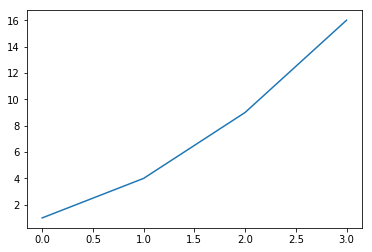

In [87]:
plt.plot([1,4, 9, 16])
plt.show()

이 때 x 축의 자료 위치 즉, 틱(tick)은 자동으로 0, 1, 2, 3 이 된다. 만약 이 x tick 위치를 별도로 명시하고 싶다면 다음과 같이 두 개의 같은 길이의 리스트 혹은 배열 자료를 넣는다.

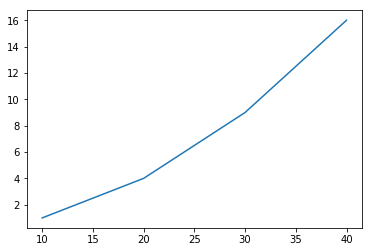

In [88]:
plt.plot([10, 20, 30, 40], [1,4, 9, 16])
plt.show()

`show` 명령은 시각화 명령을 실제로 차트로 렌더링(rendering)하고 마우스 움직임 등의 이벤트를 기다리라는 지시이다.

만약 외부 렌더링을 하지 않고 IPython이나 Jupyter 노트북에서 내부 플롯(inline plot)을 사용하도록 다음과 같이 미리 설정하였다면 별도의 이벤트 처리를 할 수 없기 때문에 `show` 명령을 추가적으로 지시하지 않아도 자동으로 그림이 그려진다. 따라서 이 강의에서는 앞으로 모두 `show` 명령을 생략하도록 한다.

Jupyter 노트북은 서버측에서 가동되므로 반드시 내부 플롯을 사용해야 한다.

In [89]:
%matplotlib inline

만약 IPython Qt 콘솔을 사용하는 경우에는 다음 명령으로 내부 플롯을 해제하고 그림을 콘솔 내부가 아닌 외부 창(window)에 그릴 수도 있다.

```
%matplotlib qt
```

## 스타일 지정

플롯 명령어는 보는 사람이 그림을 더 알아보기 쉽게 하기 위해 다양한 스타일(style)을 지원한다. `plot` 명령어에서는 다음과 같이 추가 문자열 인수를 사용하여 스타일을 지원한다.

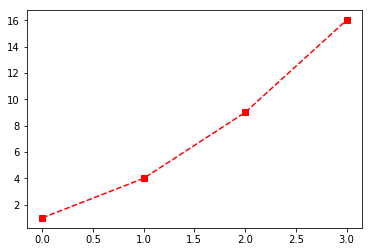

In [90]:
plt.plot([1,4,9,16], 'rs--')
plt.show()

스타일 문자열은 색깔(color), 마커(marker), 선 종류(line style)의 순서로 지정한다. 만약 이 중 일부가 생략되면 디폴트값이 적용된다.

### 색깔

색깔을 지정하는 방법은 색 이름 혹은 약자를 사용하거나 `#` 문자로 시작되는 RGB코드를 사용한다.

자주 사용되는 색깔은 한글자 약자를 사용할 수 있으며 약자는 아래 표에 정리하였다. 전체 색깔 목록은 다음 웹사이트를 참조한다.

* http://matplotlib.org/examples/color/named_colors.html

| 문자열 | 약자 |
|-|-|
| `blue` | `b` |
| `green` | `g` |
| `red` | `r` |
| `cyan` | `c` |
| `magenta` | `m` |
| `yellow` | `y` |
| `black` | `k` |
| `white` | `w` |


### 마커

 데이터 위치를 나타내는 기호를 마커(marker)라고 한다. 마커의 종류는 다음과 같다.

| 마커 문자열 | 의미 |
|-|-|
| `.` | point marker  |
| `,` | pixel marker |
| `o` | circle marker |
| `v` | triangle_down marker |
| `^` | triangle_up marker |
| `<` | triangle_left marker |
| `>` | triangle_right marker |
| `1` | tri_down marker |
| `2` | tri_up marker |
| `3` | tri_left marker |
| `4` | tri_right marker |
| `s` | square marker |
| `p` | pentagon marker |
| `*` | star marker |
| `h` | hexagon1 marker |
| `H` | hexagon2 marker |
| `+` | plus marker |
| `x` | x marker |
| `D` | diamond marker |
| `d` | thin_diamond marker |

### 선 스타일

선 스타일에는 실선(solid), 대시선(dashed), 점선(dotted), 대시-점선(dash-dit) 이 있다. 지정 문자열은 다음과 같다.

| 선 스타일 문자열 | 의미 |
|-|-|
| `-` |  solid line style
| `--` |  dashed line style
| `-.` |  dash-dot line style
| `:` |  dotted line style

### 기타 스타일

라인 플롯에서는 앞서 설명한 세 가지 스타일 이외에도 여러가지 스타일을 지정할 수 있지만 이 경우에는 인수 이름을 정확하게 지정해야 한다. 사용할 수 있는 스타일 인수의 목록은 `matplotlib.lines.Line2D` 클래스에 대한 다음 웹사이트를 참조한다.

* http://matplotlib.org/1.5.1/api/lines_api.html#matplotlib.lines.Line2D

라인 플롯에서 자주 사용되는 기타 스타일은 다음과 같다.

| 스타일 문자열 | 약자 | 의미 |
|-|-|-|
| `color` | `c`  | 선 색깔 |
| `linewidth` | `lw` | 선 굵기 |
| `linestyle` | `ls` | 선 스타일 |
| `marker` |   | 마커 종류 |
| `markersize` | `ms`  | 마커 크기 |
| `markeredgecolor` | `mec`   |	마커 선 색깔 |
| `markeredgewidth` | `mew`   |	마커 선 굵기 |
| `markerfacecolor` | `mfc`   |	마커 내부 색깔 |


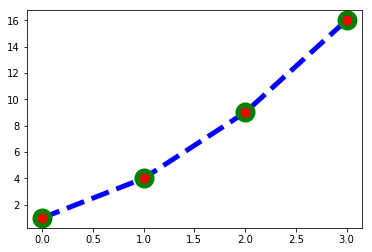

In [91]:
plt.plot([1,4,9,16], c="b", lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.show()

## 그림 범위 지정

플롯 그림을 보면 몇몇 점들은 그림의 범위 경계선에 있어서 잘 보이지 않는 경우가 있을 수 있다. 그림의 범위를 수동으로 지정하려면 `xlim` 명령과 `ylim` 명령을 사용한다. 이 명령들은 그림의 범위가 되는 x축, y축의 최소값과 최대값을 지정한다.

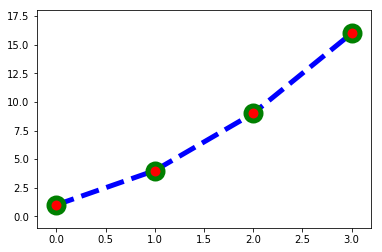

In [92]:
plt.plot([1,4,9,16], c="b", lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.xlim(-0.2, 3.2)
plt.ylim(-1, 18)
plt.show()

## 틱 설정

플롯이나 차트에서 축상의 위치 표시 지점을 틱(tick)이라고 하고 이 틱에 써진 숫자 혹은 글자를 틱 라벨(tick label)이라고 한다. 틱의 위치나 틱 라벨은 matplotlib가 자동으로 정해주지만 만약 수동으로 설정하고 싶다면 `xticks` 명령이나 `yticks` 명령을 사용한다.

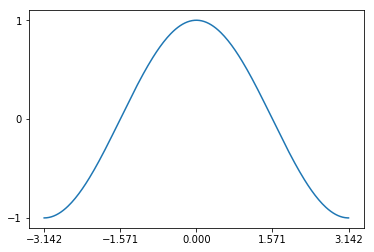

In [93]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.plot(X, C)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])
plt.show()

틱 라벨 문자열에는 `$$` 사이에 $\LaTeX$ 수학 문자식을 넣을 수도 있다.

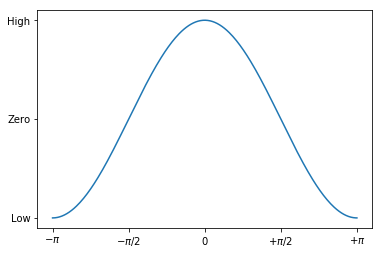

In [94]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.plot(X, C)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, 1], ["Low", "Zero", "High"])
plt.show()

## 그리드 설정

위 그림을 보면 틱 위치를 잘 보여주기 위해 그림 중간에 그리드 선(grid line)이 자동으로 그려진 것을 알 수 있다. 그리드를 사용하지 않으려면 `grid(False)` 명령을 사용한다. 다시 그리드를 사용하려면 `grid(True)`를 사용한다.

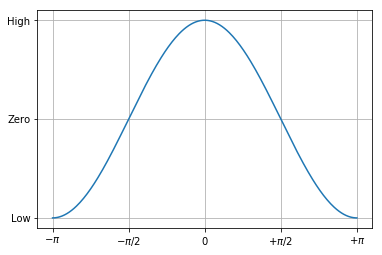

In [96]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.plot(X, C)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, 1], ["Low", "Zero", "High"])
plt.grid(True)
plt.show()

## 여러개의 선을 그리기

라인 플롯에서 선을 하나가 아니라 여러개를 그리고 싶은 경우에는 x 데이터, y 데이터, 스타일 문자열을 반복하여 인수로 넘긴다. 이 경우에는 하나의 선을 그릴 때 처럼 x 데이터나 스타일 문자열을 생략할 수 없다.

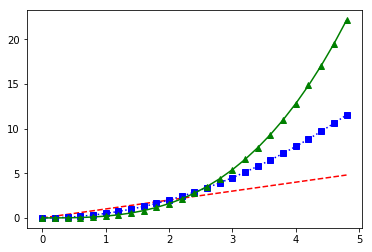

In [97]:
t = np.arange(0., 5., 0.2)
plt.plot(t, t, 'r--', t, 0.5*t**2, 'bs:', t, 0.2*t**3, 'g^-')
plt.show()

## 홀드 명령

하나의 `plot` 명령이 아니라 복수의 `plot` 명령을 하나의 그림에 겹쳐서 그릴 수도 있다. 기존의 그림 위에 겹쳐 그리도록 하는 명령은 `hold(True)` 이다. 겹치기를 종료하는 것은 `hold(False)` 이다.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first

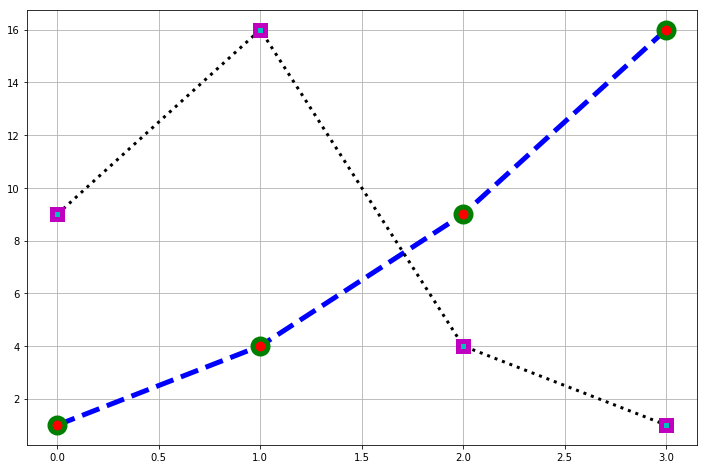

In [100]:
plt.figure(figsize=(12,8))
plt.plot([1,4,9,16], c="b", lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.hold(True)
plt.plot([9,16, 4, 1], c="k", lw=3, ls=":", marker="s", ms=10, mec="m", mew=5, mfc="c")
plt.hold(False)
plt.grid(True)
plt.show()

## 범례

여러개의 라인 플롯을 동시에 그리는 경우에는 각 선이 무슨 자료를 표시하는지를 보여주기 위해 `legend` 명령으로  범례(legend)를 추가할 수 있다. 범례의 위치는 자동으로 정해지지만 수동으로 설정하고 싶으면 `loc` 인수를 사용한다. 인수에는 문자열 혹은 숫자가 들어가며 가능한 코드는 다음과 같다.

| loc 문자열 | 숫자 |
|-|-|
| `best` |  0 | 
| `upper right` |  1 | 
| `upper left` |  2 | 
| `lower left` |  3 | 
| `lower right` |  4 | 
| `right` |  5 | 
| `center left` |  6 | 
| `center right` |  7 | 
| `lower center` |  8 | 
| `upper center` |  9 | 
| `center` |  10 | 



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


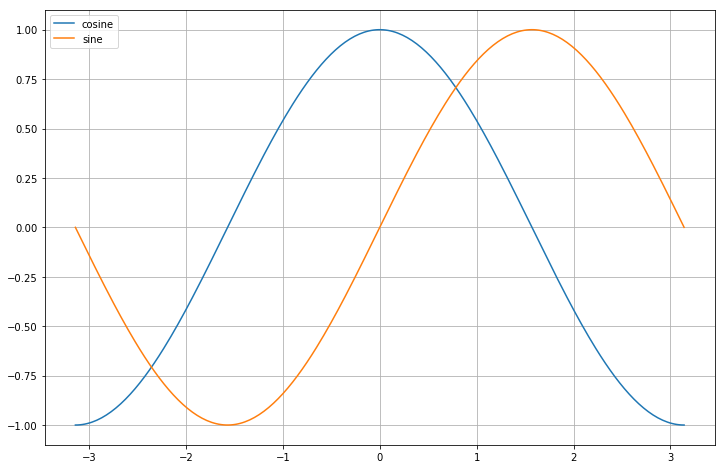

In [102]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)
plt.figure(figsize=(12,8))
plt.plot(X, C, label="cosine")
plt.hold(True)
plt.plot(X, S, label="sine")
plt.legend(loc=2)
plt.grid(True)
plt.show()

## x축, y축 라벨, 타이틀

플롯의 x축 위치와 y축 위치에는 각각 그 데이터가 의미하는 바를 표시하기 위해 라벨(label)를 추가할 수 있다. 라벨을 붙이려면 `xlabel`. `ylabel` 명령을 사용한다. 또 플롯의 위에는 `title` 명령으로 제목(title)을 붙일 수 있다.

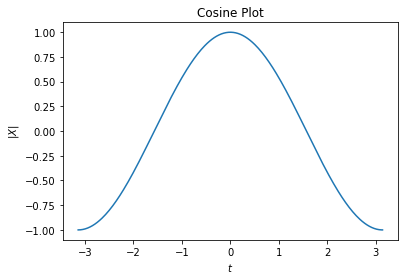

In [106]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C, label="cosine")
plt.xlabel("$t$")
plt.ylabel("$|X|$")
plt.title("Cosine Plot")
plt.show()

## 부가설명

`annotate` 명령을 사용하면 그림 내에 화살표를 포함한 부가 설명 문자열을 넣을 수 있다.

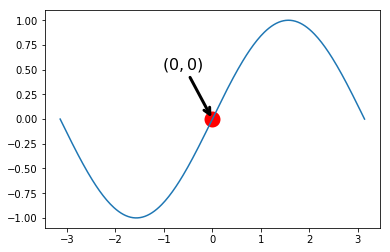

In [115]:
plt.plot(X, S, label="sine")
plt.scatter([0], [0], color="r", linewidth=10)
plt.annotate(r'$(0,0)$', xy=(0, 0), xycoords='data', xytext=(-50, 50), 
             textcoords='offset points', fontsize=16, 
             arrowprops=dict(arrowstyle="->", linewidth=3, color="k"))
plt.show()

## 그림의 구조

matplotlib가 그리는 그림은 사실 Figure, Axes, Axis 등으로 이어지는 구조를 가진다. 다음 그림은 이 구조를 설명하고 있다.

<img src="https://datascienceschool.net/upfiles/4e20efe6352e4f4fac65c26cb660f522.png" style="width: 50%">

## Figure

모든 그림은 Figure 라고 하는 부르는 `matplotlib.figure.Figure` 클래스 객체에 포함되어 있다. 내부 플롯(inline plot)이 아닌 경우에는 하나의 Figure는 하나의 아이디 숫자와 윈도우(Window)를 가진다. 

Figure 객체에 대한 자세한 설명은 다음 웹사이트를 참조한다.

* http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure

원래 Figure를 생성하려면 `figure` 명령을 사용하여 그 반환값으로 Figure 객체를 얻어야 한다. 그러나 일반적인 `plot` 명령 등을 실행하면 자동으로 Figure를 생성해주기 때문에 일반적으로는 `figure` 명령을 잘 사용하지 않는다. `figure` 명령을 명시적으로 사용하는 경우는 여러개의 윈도우를 동시에 띄워야 하거나(line plot이 아닌 경우), Jupyter 노트북 등에서(line plot의 경우) 그림의 크기를 설정하고 싶을 때이다. 그림의 크기는 figsize 인수로 설정한다.

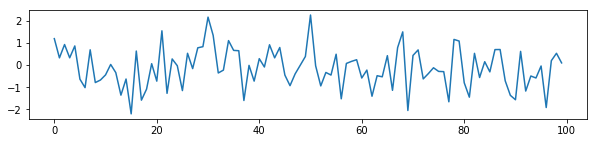

In [116]:
f1 = plt.figure(figsize=(10,2))
plt.plot(np.random.randn(100))
plt.show()

만약 명시적으로 `figure` 명령을 사용하지 않은 경우에 Figure 객체를 얻으려면 `gcf` 명령을 사용한다.

Figure(432x288) 2292246235344
Figure(432x288) 2292246235344


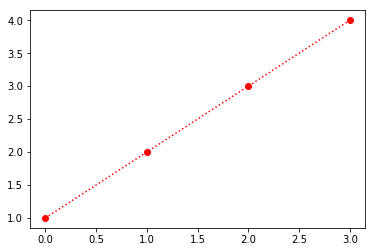

In [117]:
f1 = plt.figure(1)
plt.plot([1,2,3,4], 'ro:')
f2 = plt.gcf()
print(f1, id(f1))
print(f2, id(f2))
plt.show()

## Axes와 Subplot

때로는 다음과 같이 하나의 윈도우(Figure)안에 여러개의 플롯을 배열 형태로 보여야하는 경우도 있다. Figure 안에 있는 각각의 플롯은 Axes 라고 불리는 객체에 속한다.

Axes 객체에 대한 자세한 설명은 다음 웹사이트를 참조한다.

* http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes

Figure 안에 Axes를 생성하려면 원래는 `subplot` 명령을 사용하여 명시적으로 Axes 객체를 얻어야 한다. 그러나 plot 명령을 바로 사용해도 자동으로 Axes를 생성해 준다.

`subplot` 명령은 그리드(grid) 형태의 Axes 객체들을 생성하는데 Figure가 행렬(matrix)이고 Axes가 행렬의 원소라고 생각하면 된다. 예를 들어 
위와 아래 두 개의 플롯이 있는 경우 행이 2 이고 열이 1인 2x1 행렬이다. 

`subplot` 명령은 세개의 인수를 가지는데 처음 두개의 원소가 전체 그리드 행렬의 모양을 지시하는 두 숫자이고 세번째 인수가 네 개 중 어느것인지를 의미하는 숫자이다.

Axes(0.125,0.536818;0.775x0.343182)
Axes(0.125,0.125;0.775x0.343182)


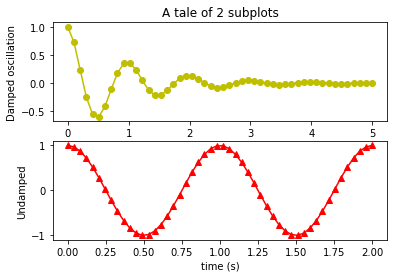

In [119]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

ax1 = plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')
print(ax1)

ax2 = plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r^-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')
print(ax2)

plt.show()

만약 2x2 형태의 네 개의 플롯이라면 다음과 같이 그린다. 이 때 `subplot` 의 인수는 (2,2,1)를 줄여서 221 라는 하나의 숫자로 표시할 수도 있다.
Axes의 위치는 위에서 부터 아래로, 왼쪽에서 오른쪽으로 카운트한다.

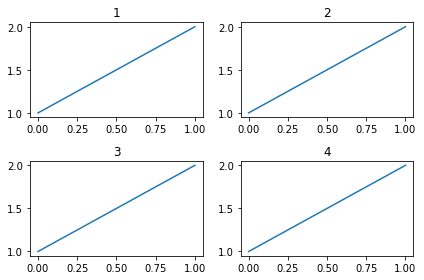

In [120]:
plt.subplot(221); plt.plot([1, 2]); plt.title(1)
plt.subplot(222); plt.plot([1, 2]); plt.title(2)
plt.subplot(223); plt.plot([1, 2]); plt.title(3)
plt.subplot(224); plt.plot([1, 2]); plt.title(4)
plt.tight_layout()
plt.show()

## xkcd 스타일

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


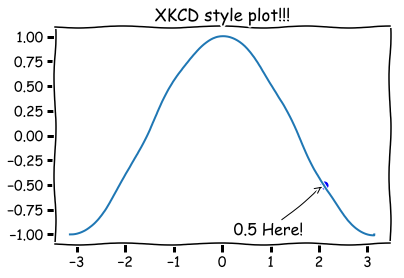

In [121]:
with plt.xkcd():
    plt.title('XKCD style plot!!!')
    plt.plot(X, C, label="cosine")
    t = 2 * np.pi / 3
    plt.scatter(t, np.cos(t), 50, color='blue')
    plt.annotate(r'0.5 Here!', xy=(t, np.cos(t)), xycoords='data', xytext=(-90, -50), 
                 textcoords='offset points', fontsize=16, arrowprops=dict(arrowstyle="->"))
plt.show()    